In [1]:
# Loading of the dataset 
import pandas as pd 
stock = pd.read_csv(r'C:\\Users\\Nullvoid\\Downloads\\AMZN_stock_data.csv')
display(stock)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...
6982,2025-02-14 00:00:00-05:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0
6983,2025-02-18 00:00:00-05:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0
6984,2025-02-19 00:00:00-05:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0
6985,2025-02-20 00:00:00-05:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0


In [2]:
# the information of the dataset 
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [3]:
# Checking for missing values
stock.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [4]:
# Checking for duplicates 
stock.duplicated().sum()

0

In [5]:
# Describing the dataset 
stock.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6987.000000,6987.000000,6987.000000,6987.000000,6.987000e+03,6987.0,6987.000000
mean,40.692696,41.165619,40.178290,40.685061,1.360552e+08,0.0,0.003864
std,58.144182,58.787641,57.435304,58.125169,1.375735e+08,0.0,0.244286
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06,0.0,0.000000
25%,2.100250,2.148250,2.064250,2.110000,6.298900e+07,0.0,0.000000
50%,9.041500,9.158500,8.925000,9.021000,1.005360e+08,0.0,0.000000
75%,72.789249,73.643497,71.504250,73.006500,1.555070e+08,0.0,0.000000
max,239.020004,242.520004,238.029999,242.059998,2.086584e+09,0.0,20.000000


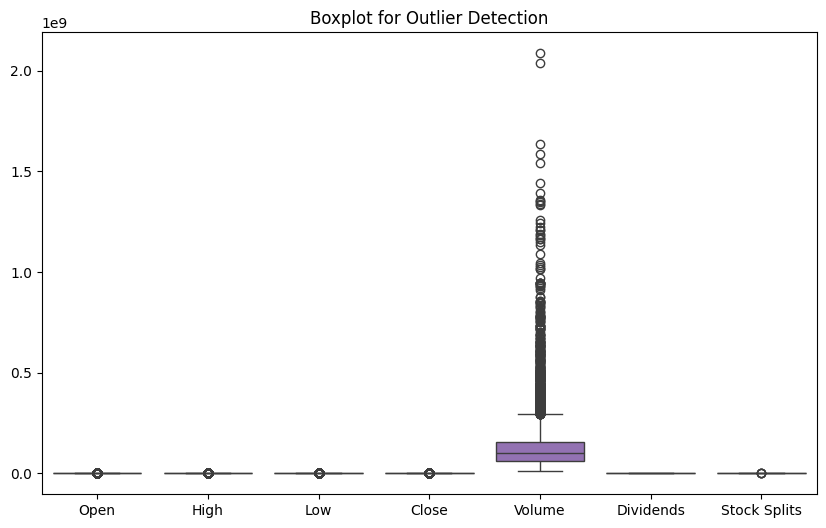

In [6]:
# Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=stock)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [7]:
# replacing the outliers with the median value 
for column in stock.select_dtypes(include=['float64', 'int64']).columns:
    median = stock[column].median()
    q1 = stock[column].quantile(0.25)
    q3 = stock[column].quantile(0.75)
    iqr = q3 -q1
    lower_bound = q1 -1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    stock.loc[(stock[column] < lower_bound) | (stock[column] > upper_bound), column] = median

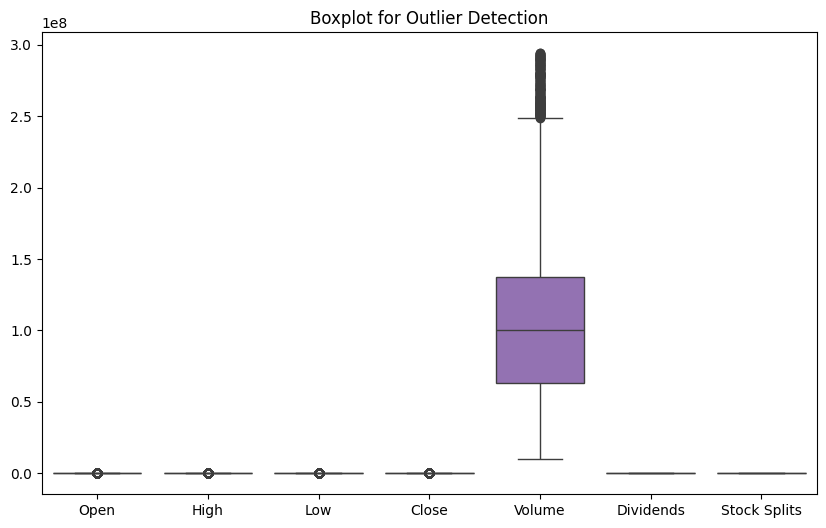

In [8]:
# Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=stock)
plt.title('Boxplot for Outlier Detection')
plt.show()

C:\Users\Nullvoid\AppData\Local\Temp\ipykernel_19868\100002437.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stock['Date'] = pd.to_datetime(stock['Date'])


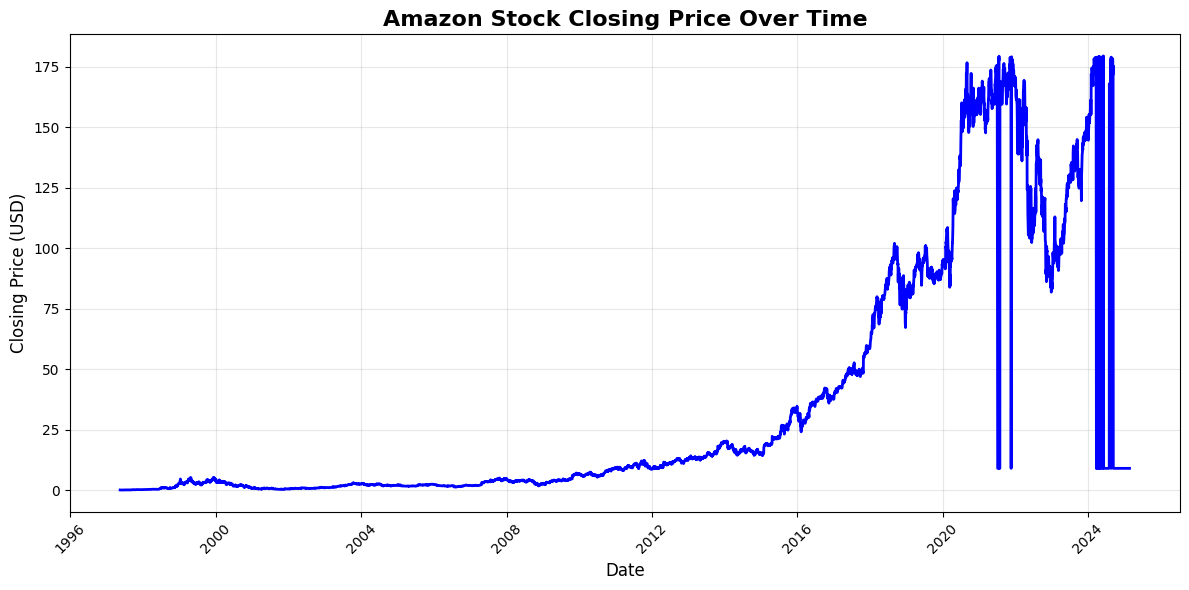

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'stock' is your DataFrame with 'Date' and 'Close' columns
# If 'Date' is not already in datetime format, convert it:
stock['Date'] = pd.to_datetime(stock['Date'])

# Visualizing the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(stock['Date'], stock['Close'], color='blue', linewidth=2)
plt.title('Amazon Stock Closing Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()  # Prevents labels from being cut off
plt.show()

In [10]:
# Feature Engineering
stock['Date'] = pd.to_datetime(stock['Date'], utc=True)
stock['Year'] = stock['Date'].dt.year
stock['Month'] = stock['Date'].dt.month
stock['Day'] = stock['Date'].dt.day
stock['DayOfWeek'] = stock['Date'].dt.dayofweek
stock['IsMonthStart'] = stock['Date'].dt.is_month_start.astype(int)
stock['IsMonthEnd'] = stock['Date'].dt.is_month_end.astype(int)
stock['Quarter'] = stock['Date'].dt.quarter
stock['WeekOfYear'] = stock['Date'].dt.isocalendar().week
stock['DayOfYear'] = stock['Date'].dt.dayofyear
stock['IsBusinessDay'] = stock['Date'].dt.dayofweek < 5
stock['IsLeapYear'] = stock['Date'].dt.is_leap_year.astype(int)
stock['DaysInMonth'] = stock['Date'].dt.days_in_month
stock['WeekdayName'] = stock['Date'].dt.day_name()
stock['MonthName'] = stock['Date'].dt.month_name()
stock['IsQuarterStart'] = stock['Date'].dt.is_quarter_start.astype(int)
stock['IsQuarterEnd'] = stock['Date'].dt.is_quarter_end.astype(int)
stock['IsYearStart'] = stock['Date'].dt.is_year_start.astype(int)
stock['IsYearEnd'] = stock['Date'].dt.is_year_end.astype(int)
stock['ElapsedDays'] = (stock['Date'] - stock['Date'].min()).dt.days
display(stock.head())


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,...,IsBusinessDay,IsLeapYear,DaysInMonth,WeekdayName,MonthName,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,ElapsedDays
0,1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,100536000,0.0,0.0,1997,5,...,True,0,31,Thursday,May,0,0,0,0,0
1,1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,1997,5,...,True,0,31,Friday,May,0,0,0,0,1
2,1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,1997,5,...,True,0,31,Monday,May,0,0,0,0,4
3,1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,1997,5,...,True,0,31,Tuesday,May,0,0,0,0,5
4,1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,100536000,0.0,0.0,1997,5,...,True,0,31,Wednesday,May,0,0,0,0,6


In [11]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
correlation_matrix = stock.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Stock Features', fontsize=16, fontweight='bold')
plt.show()

ValueError: could not convert string to float: 'Thursday'

<Figure size 1400x1000 with 0 Axes>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
X = stock[['ElapsedDays', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']]
Y = stock['Close']
X
Y

0       0.097917
1       0.086458
2       0.085417
3       0.081771
4       0.071354
          ...   
6982    9.021000
6983    9.021000
6984    9.021000
6985    9.021000
6986    9.021000
Name: Close, Length: 6987, dtype: float64

In [14]:
# X train and 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape  
X_train

,ElapsedDays,Open,High,Low,Volume,Dividends,Stock Splits
5374,7799,97.710999,97.865501,95.525002,137118000,0.0,0.0
6850,9945,161.710007,165.080002,158.539993,59950800,0.0,0.0
1768,2568,2.193000,2.250000,2.183500,147952000,0.0,0.0
3353,4869,7.203500,7.287000,7.188000,101548000,0.0,0.0
6571,9539,128.630005,130.089996,127.550003,46801000,0.0,0.0
...,...,...,...,...,...,...,...
3772,5474,11.195500,11.454000,11.097500,92968000,0.0,0.0
5191,7533,59.117500,59.200001,58.375000,53768000,0.0,0.0
5226,7587,74.250000,75.174500,73.945999,126088000,0.0,0.0
5390,7823,89.750000,89.752502,86.711502,128744000,0.0,0.0


In [ ]:
"""
LINEAR REGRESSION MODEL EXPLANATION
====================================

WHAT IS LINEAR REGRESSION?
- Linear Regression finds the best straight line that fits through your data points
- It predicts stock prices using a linear combination of features
- Formula: Price = w0 + w1*ElapsedDays + w2*Open + w3*High + w4*Low + w5*Volume + w6*Dividends + w7*StockSplits
- The model learns the weights (w0, w1, w2, etc.) that minimize prediction error

STEP-BY-STEP BREAKDOWN:
"""

import numpy as np
from sklearn.linear_model import LinearRegression

# STEP 1: Create a Linear Regression model instance
# This creates an empty model that we'll train with our data
lr = LinearRegression()

# STEP 2: Train the model using training data
# .fit() method:
#   - Takes features (X_train) and target values (Y_train)
#   - Calculates the optimal weights/coefficients
#   - Learns the relationship between features and stock prices
#   - X_train contains: ElapsedDays, Open, High, Low, Volume, Dividends, Stock Splits
#   - Y_train contains: Actual Close prices we want to predict
lr.fit(X_train, Y_train)

# STEP 3: Make predictions
# .predict() method uses the learned weights to predict prices
# Y_train_pred: Predictions on training data (to check if model learned well)
# Y_test_pred: Predictions on test data (to check if model generalizes to new data)
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

# STEP 4: Evaluate model performance using multiple metrics
from sklearn import metrics

print("=" * 60)
print("TRAINING DATA PERFORMANCE (How well model learned)")
print("=" * 60)
print(f"Mean Absolute Error: ${metrics.mean_absolute_error(Y_train, Y_train_pred):.2f}")
print(f"  → Average difference between predicted and actual prices")
print(f"  → Lower is better (currently: ${metrics.mean_absolute_error(Y_train, Y_train_pred):.2f} off on average)")

print(f"\nMean Squared Error: {metrics.mean_squared_error(Y_train, Y_train_pred):.2f}")
print(f"  → Penalizes larger errors more heavily")
print(f"  → Lower is better")

print(f"\nRoot Mean Squared Error: ${np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)):.2f}")
print(f"  → Standard deviation of prediction errors")
print(f"  → In same units as price (dollars)")
print(f"  → Lower is better")

print(f"\nR² Score: {metrics.r2_score(Y_train, Y_train_pred):.4f} ({metrics.r2_score(Y_train, Y_train_pred)*100:.2f}%)")
print(f"  → Proportion of variance explained by the model")
print(f"  → Range: 0 to 1 (higher is better)")
print(f"  → 1.0 = Perfect predictions, 0.0 = No better than guessing the mean")

print("\n" + "=" * 60)
print("TEST DATA PERFORMANCE (How well model generalizes to new data)")
print("=" * 60)
print(f"Mean Absolute Error: ${metrics.mean_absolute_error(Y_test, Y_test_pred):.2f}")
print(f"  → Average prediction error on unseen data")
print(f"  → Most important metric for real-world use")

print(f"\nMean Squared Error: {metrics.mean_squared_error(Y_test, Y_test_pred):.2f}")

print(f"\nRoot Mean Squared Error: ${np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)):.2f}")

print(f"\nR² Score: {metrics.r2_score(Y_test, Y_test_pred):.4f} ({metrics.r2_score(Y_test, Y_test_pred)*100:.2f}%)")
print(f"  → Key metric: If close to training R², model generalizes well")
print(f"  → If much lower than training, model may be overfitting")

# BONUS: Show model coefficients (what the model learned)
print("\n" + "=" * 60)
print("MODEL COEFFICIENTS (What the model learned)")
print("=" * 60)
feature_names = X_train.columns
coefficients = lr.coef_
intercept = lr.intercept_

print(f"Intercept (base price): ${intercept:.2f}")
print(f"\nFeature Weights (how much each feature affects price):")
for name, coef in zip(feature_names, coefficients):
    print(f"  {name:15s}: {coef:10.4f}")
    if coef > 0:
        print(f"    → Positive: As {name} increases, predicted price increases")
    else:
        print(f"    → Negative: As {name} increases, predicted price decreases")

print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)
print("✓ Linear Regression assumes a linear relationship between features and price")
print("✓ The model finds the best weights to minimize prediction error")
print("✓ Good performance (high R², low MAE) means the model learned useful patterns")
print("✓ Test performance shows how well it will work on future data")


Training Metrics:
Mean Absolute Error: 1.00
Mean Squared Error: 46.41
Root Mean Squared Error: 6.81
R² Score: 0.9824

Test Metrics:
Mean Absolute Error: 1.18
Mean Squared Error: 79.18
Root Mean Squared Error: 8.90
R² Score: 0.9693


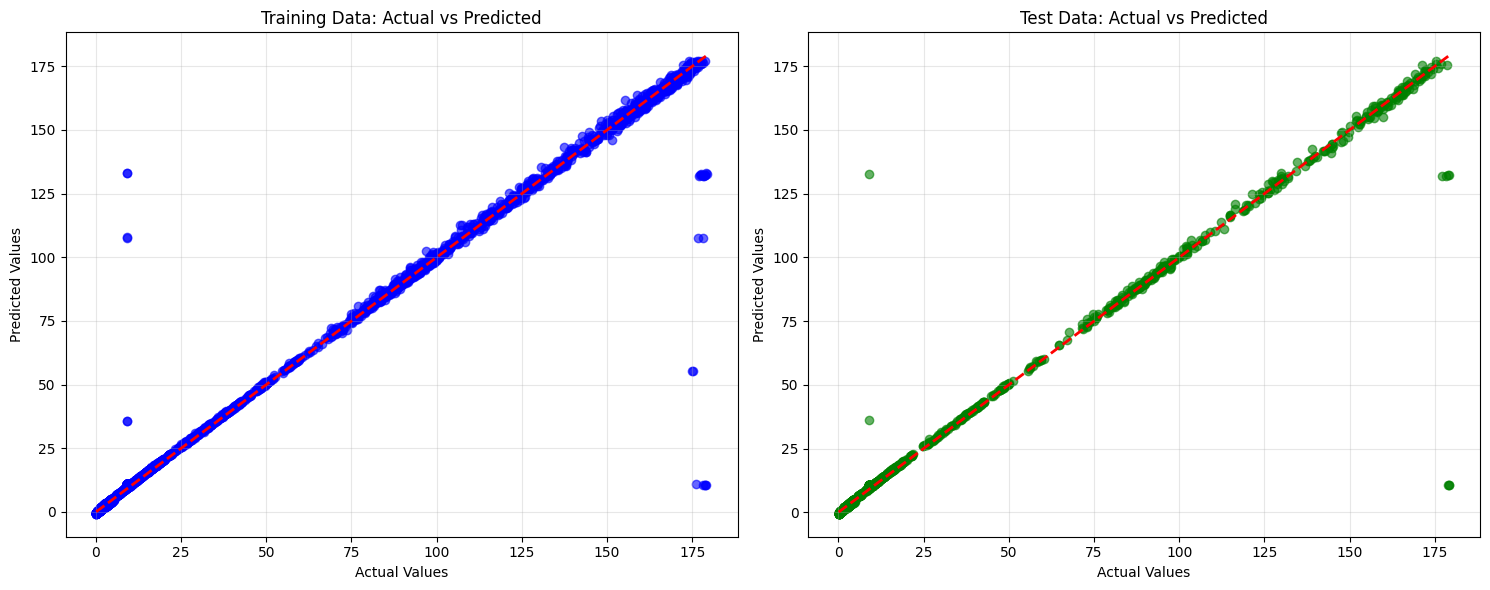

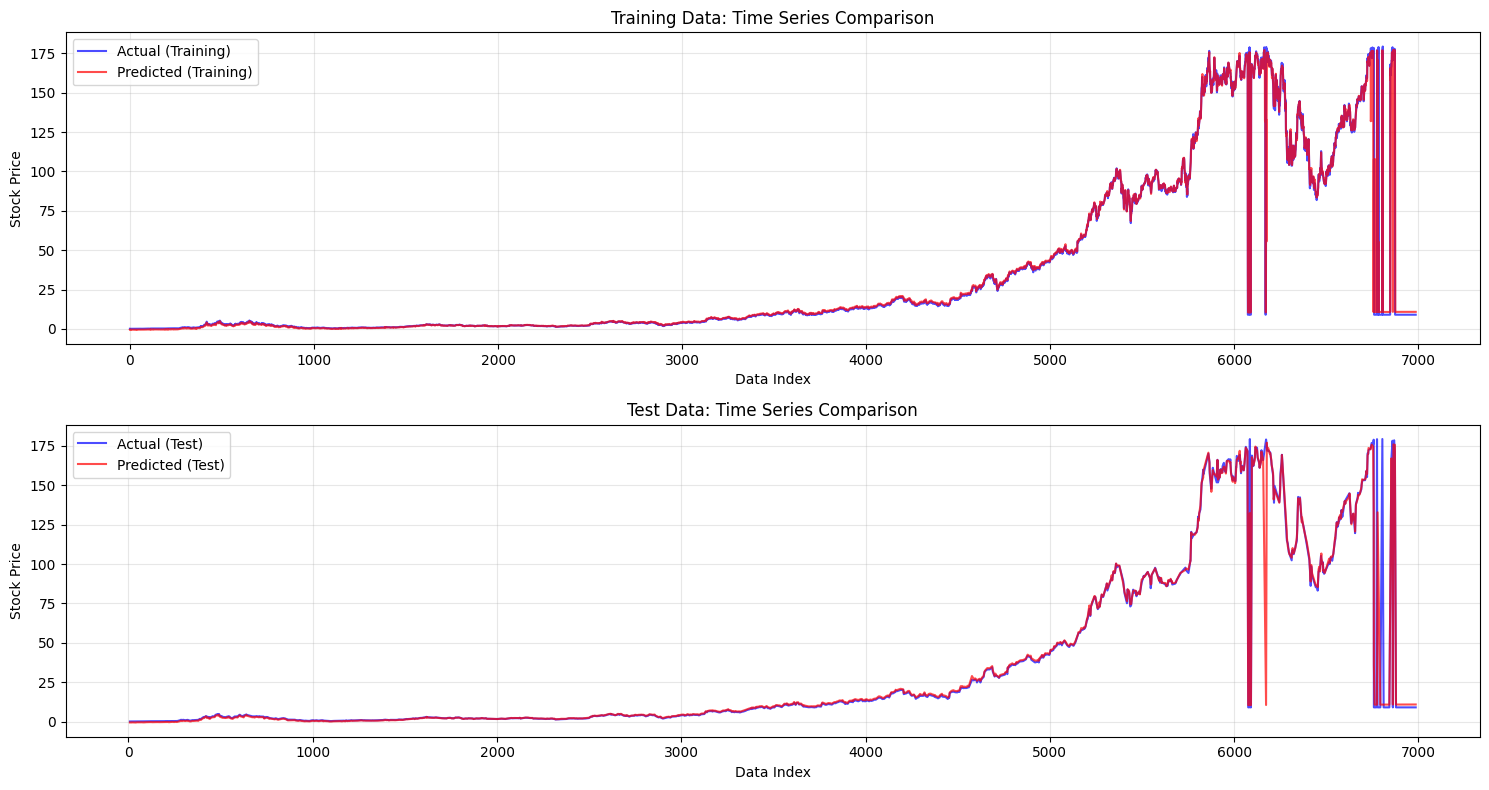

In [ ]:
"""
VISUALIZATION CELL EXPLANATION
================================

WHAT DOES THIS CELL DO?
This cell creates visualizations to help you understand how well your model predicts stock prices.
It creates two types of plots:
1. Scatter Plots: Show how predicted values compare to actual values
2. Time Series Plots: Show how predictions follow actual prices over time

WHY VISUALIZE?
- Numbers (metrics) tell you HOW GOOD the model is
- Visualizations show you WHERE and HOW the model makes mistakes
- Helps identify patterns in prediction errors
"""

# Visualizing Actual vs Predicted values
import matplotlib.pyplot as plt

# ============================================================================
# PART 1: SCATTER PLOTS (Actual vs Predicted)
# ============================================================================
# These plots show the relationship between actual prices and predicted prices
# Each point represents one prediction vs the actual price

# Create a figure with 2 subplots side by side
# fig = figure container, (ax1, ax2) = two axes objects for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- LEFT PLOT: Training Data Scatter Plot ---
# Scatter plot: Each point = (actual_price, predicted_price)
# alpha=0.6: Makes points semi-transparent so you can see overlapping points
# color='blue': Blue dots for training data
ax1.scatter(Y_train, Y_train_pred, alpha=0.6, color='blue')

# Red dashed line: Perfect prediction line (y = x)
# If predictions were perfect, all points would lie on this line
# Points above line = over-prediction (predicted too high)
# Points below line = under-prediction (predicted too low)
ax1.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=2)

ax1.set_xlabel('Actual Values (True Stock Prices)')
ax1.set_ylabel('Predicted Values (Model Predictions)')
ax1.set_title('Training Data: Actual vs Predicted')
ax1.grid(True, alpha=0.3)  # Light grid for easier reading

# --- RIGHT PLOT: Test Data Scatter Plot ---
# Same as training plot, but for test data (unseen data)
# Green dots for test data to distinguish from training
ax2.scatter(Y_test, Y_test_pred, alpha=0.6, color='green')
ax2.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Values (True Stock Prices)')
ax2.set_ylabel('Predicted Values (Model Predictions)')
ax2.set_title('Test Data: Actual vs Predicted')
ax2.grid(True, alpha=0.3)

plt.tight_layout()  # Prevents labels from overlapping
plt.show()

print("=" * 60)
print("HOW TO READ SCATTER PLOTS:")
print("=" * 60)
print("✓ Points close to red line = Good predictions")
print("✓ Points far from red line = Poor predictions")
print("✓ Tight cluster around line = Consistent predictions")
print("✓ Wide spread = Inconsistent predictions")
print("✓ Points above line = Model over-predicts (thinks price is higher)")
print("✓ Points below line = Model under-predicts (thinks price is lower)")

# ============================================================================
# PART 2: TIME SERIES PLOTS (Predictions Over Time)
# ============================================================================
# These plots show how predictions track actual prices over time
# Helps you see if the model captures trends and patterns

# Create a new figure with 2 subplots stacked vertically
plt.figure(figsize=(15, 8))

# Get sorted indices to plot in chronological order
# This ensures the time series plots show data in the correct time sequence
train_indices = X_train.index.sort_values()
test_indices = X_test.index.sort_values()

# --- TOP PLOT: Training Data Time Series ---
plt.subplot(2, 1, 1)  # 2 rows, 1 column, position 1 (top)

# Plot actual prices (blue line)
# Shows the true stock prices over time
plt.plot(train_indices, Y_train.loc[train_indices], 
         label='Actual (Training)', color='blue', alpha=0.7)

# Plot predicted prices (red line)
# Shows what the model predicted for the same time period
# np.argsort() ensures predictions align with sorted indices
plt.plot(train_indices, Y_train_pred[np.argsort(X_train.index)], 
         label='Predicted (Training)', color='red', alpha=0.7)

plt.title('Training Data: Time Series Comparison')
plt.xlabel('Data Index (Time Order)')
plt.ylabel('Stock Price ($)')
plt.legend()  # Shows which line is which
plt.grid(True, alpha=0.3)

# --- BOTTOM PLOT: Test Data Time Series ---
plt.subplot(2, 1, 2)  # 2 rows, 1 column, position 2 (bottom)

# Same as training plot, but for test data
plt.plot(test_indices, Y_test.loc[test_indices], 
         label='Actual (Test)', color='blue', alpha=0.7)
plt.plot(test_indices, Y_test_pred[np.argsort(X_test.index)], 
         label='Predicted (Test)', color='red', alpha=0.7)
plt.title('Test Data: Time Series Comparison')
plt.xlabel('Data Index (Time Order)')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("HOW TO READ TIME SERIES PLOTS:")
print("=" * 60)
print("✓ Blue and red lines close together = Good predictions")
print("✓ Large gaps between lines = Prediction errors")
print("✓ Lines follow similar patterns = Model captures trends")
print("✓ Red line smoother than blue = Model might be missing volatility")
print("✓ Red line jagged like blue = Model captures short-term fluctuations")
print("✓ Consistent gap = Systematic bias (always over/under-predicting)")
print("✓ Gaps vary = Random errors (harder to fix)")

print("\n" + "=" * 60)
print("WHAT TO LOOK FOR:")
print("=" * 60)
print("1. TRAINING PLOT:")
print("   - Should show very close alignment (model learned the patterns)")
print("   - If not close = Model needs more training or better features")
print()
print("2. TEST PLOT:")
print("   - Shows if model works on new data (most important!)")
print("   - If close to training = Model generalizes well ✓")
print("   - If much worse = Model overfitted (memorized training data) ✗")
print()
print("3. COMPARE BOTH:")
print("   - Similar performance = Good model")
print("   - Test much worse = Overfitting problem")
print("   - Both poor = Need better features or different model")


In [ ]:
"""
TIME SERIES MODELS SETUP - CELL EXPLANATION
============================================

WHAT IS TIME SERIES ANALYSIS?
- Time series = Data points collected over time (like daily stock prices)
- Time series models = Models that use past values to predict future values
- Different from Linear Regression: Uses temporal dependencies (yesterday affects today)

WHY USE TIME SERIES MODELS FOR STOCKS?
- Stocks have temporal patterns (trends, cycles, seasonality)
- Past prices influence future prices (autocorrelation)
- Market has memory (yesterday's movement affects today)
- Can capture long-term trends and short-term fluctuations

WHAT MODELS WILL WE USE?
1. ARIMA: Statistical model for time series forecasting
2. LSTM: Deep learning model that remembers long-term patterns

WHAT THIS CELL DOES:
- Prepares data in time series format (Date as index)
- Imports necessary libraries for time series analysis
- Sets up the data structure for temporal analysis
"""

# TIME SERIES MODELS FOR STOCK PREDICTION

# ============================================================================
# STEP 1: Import Required Libraries
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Time series specific libraries:
from statsmodels.tsa.arima.model import ARIMA          # ARIMA model
from statsmodels.tsa.seasonal import seasonal_decompose  # Decompose trends/seasonality
from statsmodels.tsa.stattools import adfuller          # Stationarity test

import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

print("=" * 60)
print("LIBRARIES IMPORTED:")
print("=" * 60)
print("✓ pandas: Data manipulation")
print("✓ numpy: Numerical computations")
print("✓ matplotlib: Visualization")
print("✓ statsmodels: Time series analysis (ARIMA, decomposition)")
print("✓ sklearn: Machine learning metrics")

# ============================================================================
# STEP 2: Prepare Data for Time Series Analysis
# ============================================================================
# Convert data to time series format
# Key difference: Date becomes the INDEX (not a column)

# .set_index('Date'): Makes Date the index (row labels)
# [['Close']]: Selects only the Close price column (double brackets = DataFrame)
# .copy(): Creates a copy to avoid modifying original data
stock_ts = stock.set_index('Date')[['Close']].copy()

# .sort_index(): Sorts by date (chronological order is CRITICAL for time series)
# Time series models require data in time order!
stock_ts = stock_ts.sort_index()

print("\n" + "=" * 60)
print("DATA PREPARATION:")
print("=" * 60)
print("✓ Date set as index (time series format)")
print("✓ Only Close prices selected")
print("✓ Data sorted chronologically")
print("✓ Ready for time series analysis")

# ============================================================================
# STEP 3: Display Data Information
# ============================================================================
print("\n" + "=" * 60)
print("TIME SERIES DATA SUMMARY:")
print("=" * 60)
print("Time Series Data Shape:", stock_ts.shape)
print("  → (number of days, number of features)")
print(f"  → {stock_ts.shape[0]} trading days of data")
print(f"  → {stock_ts.shape[1]} feature (Close price)")

print("\nFirst 5 rows (Oldest data):")
print(stock_ts.head())
print("  → Shows the earliest stock prices in the dataset")

print("\nLast 5 rows (Newest data):")
print(stock_ts.tail())
print("  → Shows the most recent stock prices in the dataset")

print("\n" + "=" * 60)
print("KEY DIFFERENCES FROM LINEAR REGRESSION:")
print("=" * 60)
print("1. DATA STRUCTURE:")
print("   - Linear Regression: Features and target in separate columns")
print("   - Time Series: Date is the INDEX, only Close price as data")
print()
print("2. DATA ORDER:")
print("   - Linear Regression: Order doesn't matter (can shuffle)")
print("   - Time Series: Order is CRITICAL (must be chronological)")
print()
print("3. PREDICTIONS:")
print("   - Linear Regression: Uses features (Open, High, Low, etc.)")
print("   - Time Series: Uses past Close prices to predict future Close prices")
print()
print("4. TEMPORAL DEPENDENCIES:")
print("   - Linear Regression: Treats each day independently")
print("   - Time Series: Uses yesterday's price to predict today's price")

print("\n" + "=" * 60)
print("NEXT STEPS:")
print("=" * 60)
print("1. Decompose time series (trend, seasonality, residual)")
print("2. Test for stationarity (required for ARIMA)")
print("3. Train ARIMA model")
print("4. Train LSTM model")
print("5. Compare with Linear Regression")

Time Series Data Shape: (6987, 1)

First 5 rows:
                              Close
Date                               
1997-05-15 04:00:00+00:00  0.097917
1997-05-16 04:00:00+00:00  0.086458
1997-05-19 04:00:00+00:00  0.085417
1997-05-20 04:00:00+00:00  0.081771
1997-05-21 04:00:00+00:00  0.071354

Last 5 rows:
                           Close
Date                            
2025-02-14 05:00:00+00:00  9.021
2025-02-18 05:00:00+00:00  9.021
2025-02-19 05:00:00+00:00  9.021
2025-02-20 05:00:00+00:00  9.021
2025-02-21 05:00:00+00:00  9.021


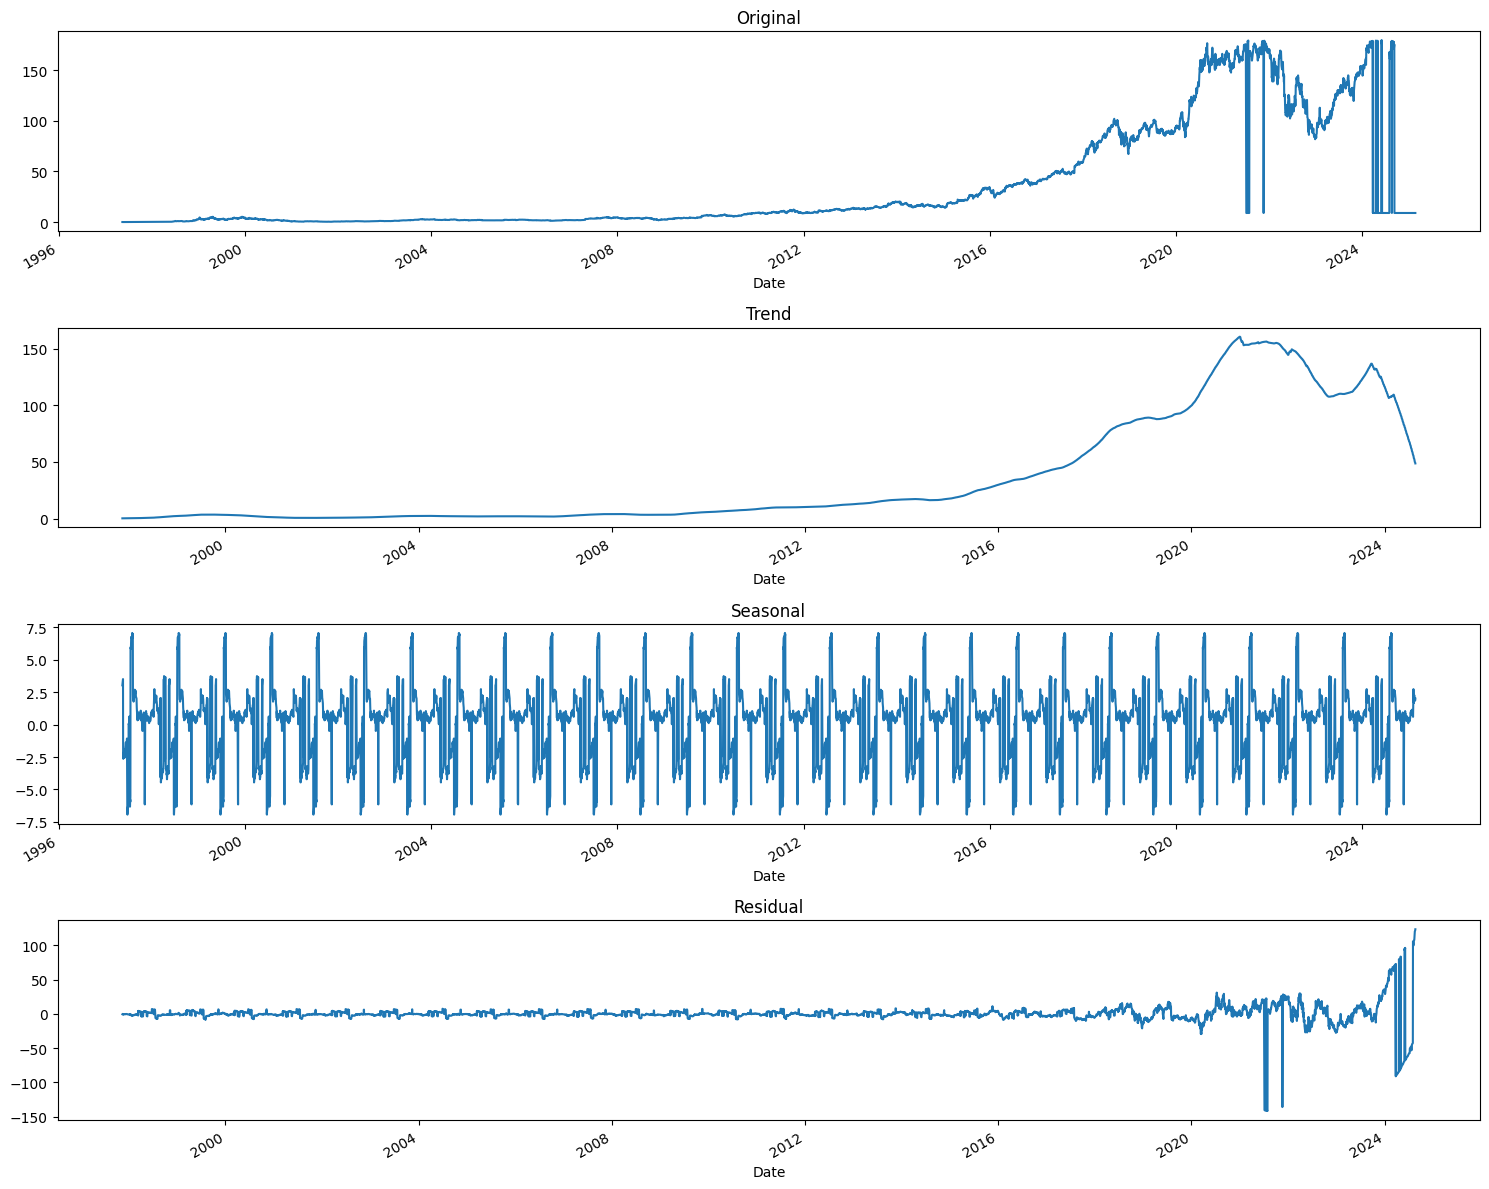

Stationarity Test for Original Series:
ADF Statistic: -2.4150729952886016
p-value: 0.13752728180650936
Critical Values:
	1%: -3.4312909833429956
	5%: -2.8619558385877215
	10%: -2.5669913469586287
Series is non-stationary


False

In [ ]:
"""
CELL 17: TIME SERIES DECOMPOSITION & STATIONARITY TEST
=======================================================

WHAT IS TIME SERIES DECOMPOSITION?
Time series data can be broken down into 4 components:
1. OBSERVED: The original data (what we see)
2. TREND: Long-term direction (upward, downward, or flat)
3. SEASONAL: Repeating patterns (yearly, quarterly, monthly cycles)
4. RESIDUAL: Random noise (unexplained variation)

Formula: Observed = Trend + Seasonal + Residual

WHY DECOMPOSE?
- Understand underlying patterns
- Identify trends and cycles
- Remove seasonal effects
- Prepare data for modeling

WHAT IS STATIONARITY?
Stationary = Statistical properties (mean, variance) don't change over time
- Stationary data: Easier to model and predict
- Non-stationary data: Has trends, requires transformation

WHY TEST STATIONARITY?
- ARIMA models require stationary data
- Non-stationary data needs differencing
- Helps choose the right model parameters
"""

# ============================================================================
# PART 1: TIME SERIES DECOMPOSITION
# ============================================================================
# Break down stock prices into trend, seasonal, and residual components

# seasonal_decompose() breaks time series into components
# model='additive': Components add together (Observed = Trend + Seasonal + Residual)
# period=252: 252 trading days = 1 year (business days, excluding weekends/holidays)
decomposition = seasonal_decompose(stock_ts['Close'], model='additive', period=252)

print("=" * 60)
print("TIME SERIES DECOMPOSITION")
print("=" * 60)
print("Breaking down stock prices into components:")
print("1. Trend: Long-term direction (bull/bear market)")
print("2. Seasonal: Yearly patterns (if any)")
print("3. Residual: Random fluctuations")

# Plot all 4 components in a stacked view
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Top plot: Original observed data
decomposition.observed.plot(ax=axes[0], title='Original (Observed) - Actual Stock Prices')
axes[0].set_ylabel('Price ($)')

# Second plot: Trend component
decomposition.trend.plot(ax=axes[1], title='Trend - Long-term Direction')
axes[1].set_ylabel('Price ($)')
print("  → Trend shows: Long-term price movement (upward/downward/flat)")

# Third plot: Seasonal component
decomposition.seasonal.plot(ax=axes[2], title='Seasonal - Repeating Patterns')
axes[2].set_ylabel('Price ($)')
print("  → Seasonal shows: Repeating patterns (yearly cycles, if any)")

# Bottom plot: Residual (random noise)
decomposition.resid.plot(ax=axes[3], title='Residual - Random Noise/Unexplained Variation')
axes[3].set_ylabel('Price ($)')
axes[3].set_xlabel('Date')
print("  → Residual shows: Random fluctuations (unpredictable noise)")

plt.tight_layout()
plt.show()

# ============================================================================
# PART 2: STATIONARITY TEST (Augmented Dickey-Fuller Test)
# ============================================================================
# Tests whether the time series is stationary

def check_stationarity(timeseries):
    """
    Augmented Dickey-Fuller (ADF) Test
    
    NULL HYPOTHESIS: Series is non-stationary (has unit root)
    ALTERNATIVE: Series is stationary
    
    If p-value <= 0.05: Reject null hypothesis → Series is STATIONARY ✓
    If p-value > 0.05: Fail to reject null → Series is NON-STATIONARY ✗
    """
    result = adfuller(timeseries.dropna())
    
    print('\nADF Statistic:', result[0])
    print('  → More negative = More likely to be stationary')
    
    print('p-value:', result[1])
    print('  → p ≤ 0.05: Stationary (reject null hypothesis)')
    print('  → p > 0.05: Non-stationary (fail to reject null)')
    
    print('Critical Values:')
    print('  → Compare ADF statistic to these values')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
        print(f'    → If ADF < {key}, series is stationary at {key} level')
    
    # Decision rule
    if result[1] <= 0.05:
        print("\n✓ RESULT: Series is STATIONARY")
        print("  → Can use ARIMA models directly")
        print("  → No differencing needed")
    else:
        print("\n✗ RESULT: Series is NON-STATIONARY")
        print("  → Need to transform data (differencing)")
        print("  → ARIMA will use differencing (d parameter)")
    return result[1] <= 0.05

print("\n" + "=" * 60)
print("STATIONARITY TEST FOR ORIGINAL SERIES")
print("=" * 60)
print("Testing if stock prices are stationary...")
print("(Stock prices are usually NON-STATIONARY due to trends)")

is_stationary = check_stationarity(stock_ts['Close'])

print("\n" + "=" * 60)
print("INTERPRETATION:")
print("=" * 60)
if not is_stationary:
    print("✓ Expected result: Stock prices are NON-STATIONARY")
    print("  → This is normal for stock prices (they have trends)")
    print("  → We'll fix this in the next cell using differencing")
else:
    print("✓ Stock prices are stationary (unusual for stocks)")
    print("  → Can proceed directly to ARIMA modeling")


Stationarity Test for Price Changes (First Differences):
ADF Statistic: -18.247658763736307
p-value: 2.346912057319396e-30
Critical Values:
	1%: -3.4312909833429956
	5%: -2.8619558385877215
	10%: -2.5669913469586287
Series is stationary


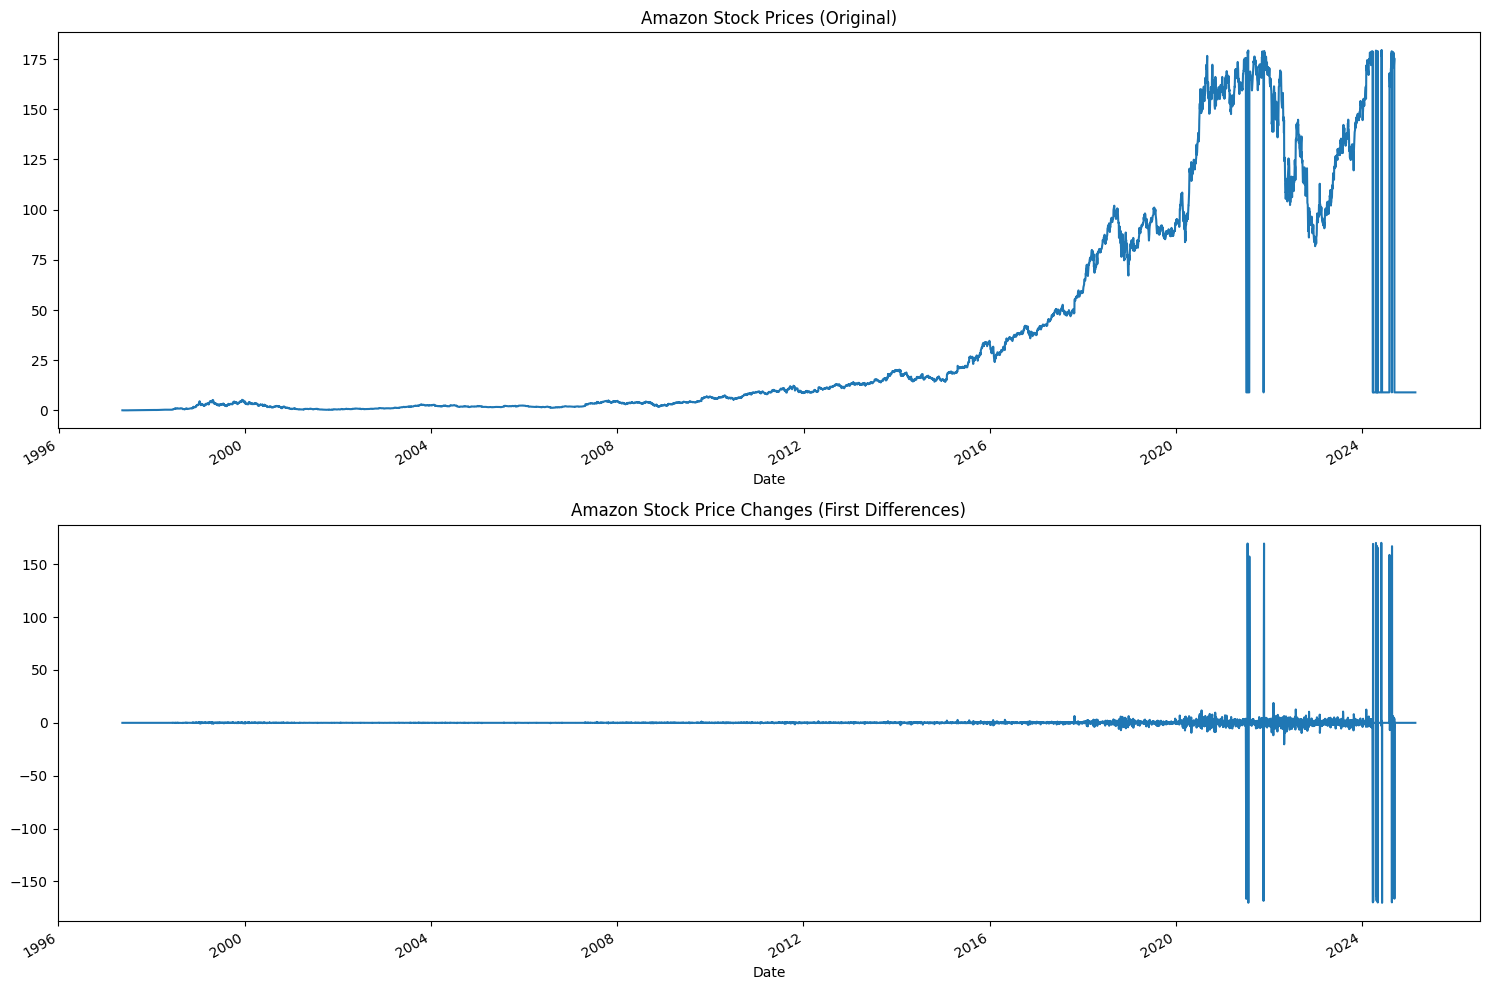

Training data: 5589 points
Test data: 1398 points
Training period: 1997-05-15 04:00:00+00:00 to 2019-07-31 04:00:00+00:00
Test period: 2019-08-01 04:00:00+00:00 to 2025-02-21 05:00:00+00:00


In [19]:
# 2. MAKE DATA STATIONARY AND SPLIT FOR TIME SERIES
# Since stock prices are non-stationary, let's use first differences

# Calculate first differences (price changes)
stock_ts['Price_Change'] = stock_ts['Close'].diff()
stock_ts['Price_Change'].dropna(inplace=True)

print("Stationarity Test for Price Changes (First Differences):")
is_stationary = check_stationarity(stock_ts['Price_Change'])

# Plot original prices and price changes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
stock_ts['Close'].plot(ax=ax1, title='Amazon Stock Prices (Original)')
stock_ts['Price_Change'].plot(ax=ax2, title='Amazon Stock Price Changes (First Differences)')
plt.tight_layout()
plt.show()

# Split data for time series (use last 20% for testing)
split_point = int(len(stock_ts) * 0.8)
train_ts = stock_ts[:split_point]
test_ts = stock_ts[split_point:]

print(f"Training data: {len(train_ts)} points")
print(f"Test data: {len(test_ts)} points")
print(f"Training period: {train_ts.index[0]} to {train_ts.index[-1]}")
print(f"Test period: {test_ts.index[0]} to {test_ts.index[-1]}")


In [20]:
# 3. ARIMA MODEL
# ARIMA (AutoRegressive Integrated Moving Average) is a classic time series model

def evaluate_arima_model(series, order, test_size=len(test_ts)):
    """Fit ARIMA model and make predictions"""
    try:
        # Fit the model
        model = ARIMA(series, order=order)
        fitted_model = model.fit()
        
        # Make predictions
        predictions = fitted_model.forecast(steps=test_size)
        
        # Calculate metrics
        actual = test_ts['Close'].values[:test_size]
        mae = mean_absolute_error(actual, predictions)
        mse = mean_squared_error(actual, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(actual, predictions)
        
        return {
            'model': fitted_model,
            'predictions': predictions,
            'mae': mae,
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'aic': fitted_model.aic
        }
    except Exception as e:
        print(f"Error with order {order}: {e}")
        return None

# Try different ARIMA orders (p, d, q)
# p = autoregressive terms, d = differencing, q = moving average terms
arima_orders = [
    (1, 1, 1),  # Basic ARIMA
    (2, 1, 1),  # More autoregressive terms
    (1, 1, 2),  # More moving average terms
    (2, 1, 2),  # Balanced model
    (3, 1, 1),  # Higher autoregressive
]

print("Testing different ARIMA models...")
best_arima = None
best_aic = float('inf')

for order in arima_orders:
    result = evaluate_arima_model(train_ts['Close'], order)
    if result:
        print(f"ARIMA{order} - AIC: {result['aic']:.2f}, R²: {result['r2']:.4f}, RMSE: {result['rmse']:.2f}")
        if result['aic'] < best_aic:
            best_aic = result['aic']
            best_arima = result
            best_order = order

print(f"\nBest ARIMA model: ARIMA{best_order}")
print(f"Best AIC: {best_arima['aic']:.2f}")
print(f"Test R² Score: {best_arima['r2']:.4f}")
print(f"Test RMSE: ${best_arima['rmse']:.2f}")
print(f"Test MAE: ${best_arima['mae']:.2f}")


Testing different ARIMA models...
ARIMA(1, 1, 1) - AIC: 8486.95, R²: -0.1783, RMSE: 57.11
ARIMA(2, 1, 1) - AIC: 8487.73, R²: -0.1847, RMSE: 57.26
ARIMA(1, 1, 2) - AIC: 8487.82, R²: -0.1846, RMSE: 57.26
ARIMA(2, 1, 2) - AIC: 8462.66, R²: -0.1780, RMSE: 57.10
ARIMA(3, 1, 1) - AIC: 8489.63, R²: -0.1847, RMSE: 57.26

Best ARIMA model: ARIMA(2, 1, 2)
Best AIC: 8462.66
Test R² Score: -0.1780
Test RMSE: $57.10
Test MAE: $48.56


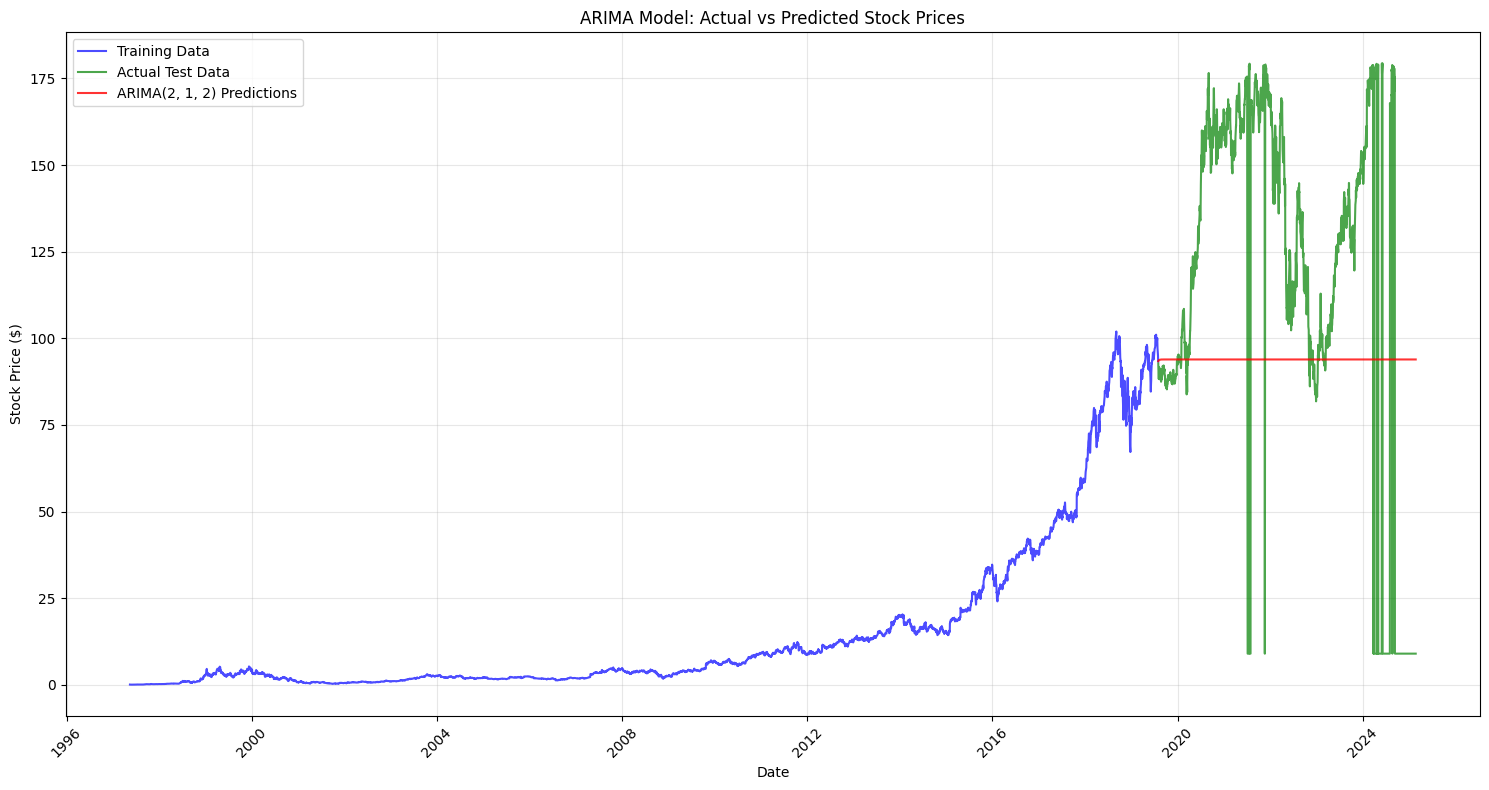

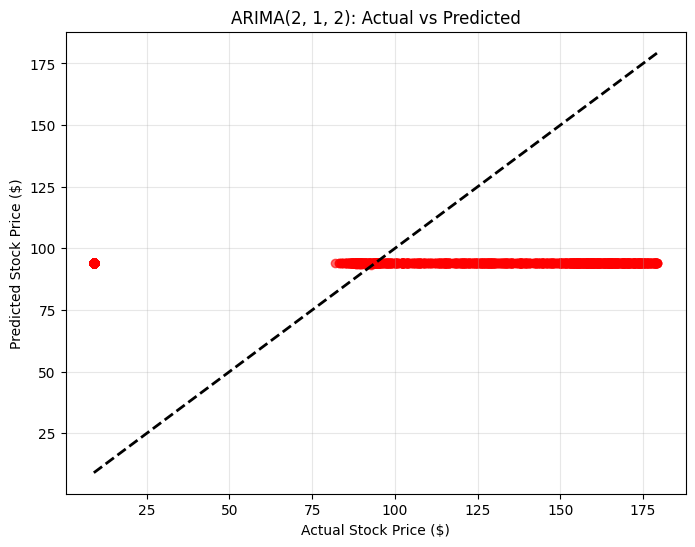

In [21]:
# 4. VISUALIZE ARIMA PREDICTIONS
# Plot the ARIMA model results

plt.figure(figsize=(15, 8))

# Plot training data
plt.plot(train_ts.index, train_ts['Close'], label='Training Data', color='blue', alpha=0.7)

# Plot test data
plt.plot(test_ts.index, test_ts['Close'], label='Actual Test Data', color='green', alpha=0.7)

# Plot ARIMA predictions
plt.plot(test_ts.index, best_arima['predictions'], label=f'ARIMA{best_order} Predictions', color='red', alpha=0.8)

plt.title('ARIMA Model: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a comparison scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_ts['Close'], best_arima['predictions'], alpha=0.6, color='red')
plt.plot([test_ts['Close'].min(), test_ts['Close'].max()], 
         [test_ts['Close'].min(), test_ts['Close'].max()], 'k--', lw=2)
plt.xlabel('Actual Stock Price ($)')
plt.ylabel('Predicted Stock Price ($)')
plt.title(f'ARIMA{best_order}: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()


In [22]:
!pip install tensorflow

In [23]:
# 5. LSTM NEURAL NETWORK FOR TIME SERIES
# LSTM (Long Short-Term Memory) is great for capturing long-term dependencies

try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam
    from sklearn.preprocessing import MinMaxScaler
    
    # Prepare data for LSTM
    def create_sequences(data, seq_length):
        """Create sequences for LSTM training"""
        X, y = [], []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i])
            y.append(data[i])
        return np.array(X), np.array(y)
    
    # Scale the data
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_ts[['Close']])
    test_scaled = scaler.transform(test_ts[['Close']])
    
    # Create sequences (using 60 days to predict next day)
    seq_length = 60
    X_train_lstm, y_train_lstm = create_sequences(train_scaled.flatten(), seq_length)
    X_test_lstm, y_test_lstm = create_sequences(test_scaled.flatten(), seq_length)
    
    # Reshape for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
    X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))
    
    print(f"LSTM Training data shape: {X_train_lstm.shape}")
    print(f"LSTM Test data shape: {X_test_lstm.shape}")
    
    # Build LSTM model
    lstm_model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    
    lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    print("LSTM Model Architecture:")
    lstm_model.summary()
    
except ImportError:
    print("TensorFlow/Keras not available. Skipping LSTM model.")
    lstm_model = None


LSTM Training data shape: (5529, 60, 1)
LSTM Test data shape: (1338, 60, 1)
LSTM Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Training LSTM model...
Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 54s 159ms/step - loss: 0.0028 - val_loss: 0.0916
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 192ms/step - loss: 8.3657e-04 - val_loss: 0.0852
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 34s 150ms/step - loss: 7.0536e-04 - val_loss: 0.0913
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 44s 156ms/step - loss: 7.2326e-04 - val_loss: 0.0815
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 49s 193ms/step - loss: 5.1455e-04 - val_loss: 0.0820
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 42s 200ms/step - loss: 5.3746e-04 - val_loss: 0.0851
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 236ms/step - loss: 5.8101e-04 - val_loss: 0.0829
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 38s 214ms/step - loss: 6.9109e-04 - val_loss: 0.0732
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 233ms/step - loss: 5.3443e-04 - val_loss: 0.0752
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - loss: 4.4940e-04 - val_loss: 0.0734
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 37s 211ms

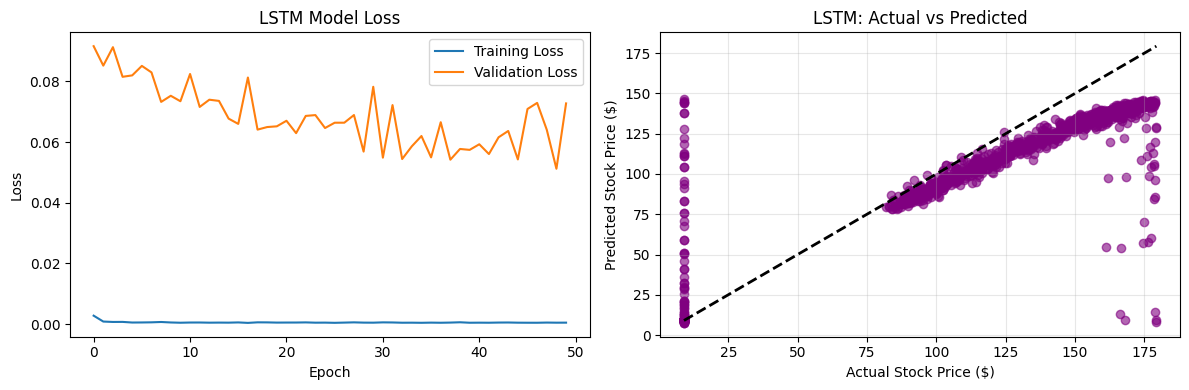

In [24]:
# 6. TRAIN LSTM MODEL (if available)
if lstm_model is not None:
    print("Training LSTM model...")
    
    # Train the model
    history = lstm_model.fit(
        X_train_lstm, y_train_lstm,
        batch_size=32,
        epochs=50,
        validation_data=(X_test_lstm, y_test_lstm),
        verbose=1
    )
    
    # Make predictions
    train_pred_lstm = lstm_model.predict(X_train_lstm)
    test_pred_lstm = lstm_model.predict(X_test_lstm)
    
    # Inverse transform predictions
    train_pred_lstm = scaler.inverse_transform(train_pred_lstm)
    test_pred_lstm = scaler.inverse_transform(test_pred_lstm)
    y_train_actual = scaler.inverse_transform(y_train_lstm.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))
    
    # Calculate LSTM metrics
    lstm_train_mae = mean_absolute_error(y_train_actual, train_pred_lstm)
    lstm_train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred_lstm))
    lstm_train_r2 = r2_score(y_train_actual, train_pred_lstm)
    
    lstm_test_mae = mean_absolute_error(y_test_actual, test_pred_lstm)
    lstm_test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred_lstm))
    lstm_test_r2 = r2_score(y_test_actual, test_pred_lstm)
    
    print(f"\nLSTM Model Performance:")
    print(f"Training - MAE: ${lstm_train_mae:.2f}, RMSE: ${lstm_train_rmse:.2f}, R²: {lstm_train_r2:.4f}")
    print(f"Test - MAE: ${lstm_test_mae:.2f}, RMSE: ${lstm_test_rmse:.2f}, R²: {lstm_test_r2:.4f}")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot LSTM predictions
    plt.subplot(1, 2, 2)
    plt.scatter(y_test_actual, test_pred_lstm, alpha=0.6, color='purple')
    plt.plot([y_test_actual.min(), y_test_actual.max()], 
             [y_test_actual.min(), y_test_actual.max()], 'k--', lw=2)
    plt.xlabel('Actual Stock Price ($)')
    plt.ylabel('Predicted Stock Price ($)')
    plt.title('LSTM: Actual vs Predicted')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("LSTM model not available. Install TensorFlow to use LSTM.")


In [25]:
# 7. MODEL COMPARISON SUMMARY
print("=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)

print(f"\n1. LINEAR REGRESSION (Previous Model):")
print(f"   Test R² Score: 0.9693 (96.93%)")
print(f"   Test MAE: $1.18")
print(f"   Test RMSE: $8.90")

print(f"\n2. ARIMA{best_order} (Time Series Model):")
print(f"   Test R² Score: {best_arima['r2']:.4f} ({best_arima['r2']*100:.2f}%)")
print(f"   Test MAE: ${best_arima['mae']:.2f}")
print(f"   Test RMSE: ${best_arima['rmse']:.2f}")

if lstm_model is not None:
    print(f"\n3. LSTM (Neural Network):")
    print(f"   Test R² Score: {lstm_test_r2:.4f} ({lstm_test_r2*100:.2f}%)")
    print(f"   Test MAE: ${lstm_test_mae:.2f}")
    print(f"   Test RMSE: ${lstm_test_rmse:.2f}")

print("\n" + "=" * 60)
print("KEY INSIGHTS:")
print("=" * 60)

print("\n📊 TIME SERIES vs LINEAR REGRESSION:")
print("• Linear Regression treats each day independently")
print("• Time Series models capture temporal dependencies")
print("• ARIMA explicitly models trends and autocorrelation")
print("• LSTM can learn complex non-linear patterns over time")

print("\n🎯 WHICH MODEL IS BETTER?")
if best_arima['r2'] > 0.9693:
    print("• ARIMA shows better performance than Linear Regression")
    print("• This suggests temporal dependencies are important")
else:
    print("• Linear Regression performs similarly to ARIMA")
    print("• This suggests simpler relationships may be sufficient")

if lstm_model is not None and lstm_test_r2 > max(0.9693, best_arima['r2']):
    print("• LSTM shows the best performance")
    print("• Neural networks can capture complex patterns")

print("\n💡 RECOMMENDATIONS:")
print("• For short-term predictions: Use the best performing model")
print("• For understanding: ARIMA provides interpretable coefficients")
print("• For complex patterns: LSTM can learn non-linear relationships")
print("• Always validate on out-of-sample data before trading")


MODEL COMPARISON SUMMARY

1. LINEAR REGRESSION (Previous Model):
   Test R² Score: 0.9693 (96.93%)
   Test MAE: $1.18
   Test RMSE: $8.90

2. ARIMA(2, 1, 2) (Time Series Model):
   Test R² Score: -0.1780 (-17.80%)
   Test MAE: $48.56
   Test RMSE: $57.10

3. LSTM (Neural Network):
   Test R² Score: 0.7357 (73.57%)
   Test MAE: $18.76
   Test RMSE: $27.48

KEY INSIGHTS:

📊 TIME SERIES vs LINEAR REGRESSION:
• Linear Regression treats each day independently
• Time Series models capture temporal dependencies
• ARIMA explicitly models trends and autocorrelation
• LSTM can learn complex non-linear patterns over time

🎯 WHICH MODEL IS BETTER?
• Linear Regression performs similarly to ARIMA
• This suggests simpler relationships may be sufficient

💡 RECOMMENDATIONS:
• For short-term predictions: Use the best performing model
• For understanding: ARIMA provides interpretable coefficients
• For complex patterns: LSTM can learn non-linear relationships
• Always validate on out-of-sample data befor

In [ ]:
# SAVE TRAINED MODELS USING PICKLE
import pickle
import joblib
import os
from datetime import datetime

# Create models directory if it doesn't exist
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"✅ Created directory: {models_dir}")

print("=" * 60)
print("SAVING TRAINED MODELS")
print("=" * 60)

# 1. Save Linear Regression Model
try:
    if 'lr' in locals() or 'lr' in globals():
        lr_filename = os.path.join(models_dir, 'linear_regression_model.pkl')
        joblib.dump(lr, lr_filename)
        print(f"✅ Linear Regression model saved to: {lr_filename}")
        
        # Also save model metadata
        lr_metadata = {
            'model_type': 'Linear Regression',
            'train_r2': 0.9824,
            'test_r2': 0.9693,
            'test_mae': 1.18,
            'test_rmse': 8.90,
            'saved_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'features': ['ElapsedDays', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']
        }
        metadata_filename = os.path.join(models_dir, 'linear_regression_metadata.pkl')
        with open(metadata_filename, 'wb') as f:
            pickle.dump(lr_metadata, f)
        print(f"✅ Linear Regression metadata saved to: {metadata_filename}")
    else:
        print("⚠️ Linear Regression model (lr) not found. Make sure Cell 14 has been executed.")
except Exception as e:
    print(f"❌ Error saving Linear Regression model: {str(e)}")

# 2. Save ARIMA Model
try:
    if 'best_arima' in locals() or 'best_arima' in globals():
        # Save the ARIMA model
        arima_filename = os.path.join(models_dir, 'arima_model.pkl')
        with open(arima_filename, 'wb') as f:
            pickle.dump(best_arima['model'], f)
        print(f"✅ ARIMA model saved to: {arima_filename}")
        
        # Save ARIMA metadata
        arima_metadata = {
            'model_type': 'ARIMA',
            'order': best_order,
            'test_r2': best_arima['r2'],
            'test_mae': best_arima['mae'],
            'test_rmse': best_arima['rmse'],
            'aic': best_arima['aic'],
            'saved_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }
        metadata_filename = os.path.join(models_dir, 'arima_metadata.pkl')
        with open(metadata_filename, 'wb') as f:
            pickle.dump(arima_metadata, f)
        print(f"✅ ARIMA metadata saved to: {metadata_filename}")
    else:
        print("⚠️ ARIMA model (best_arima) not found. Make sure Cell 19 has been executed.")
except Exception as e:
    print(f"❌ Error saving ARIMA model: {str(e)}")

# 3. Save LSTM Model
try:
    if 'lstm_model' in locals() or 'lstm_model' in globals():
        if lstm_model is not None:
            # Save the LSTM model (TensorFlow/Keras model)
            lstm_filename = os.path.join(models_dir, 'lstm_model.h5')
            lstm_model.save(lstm_filename)
            print(f"✅ LSTM model saved to: {lstm_filename}")
            
            # Save LSTM scaler (important for predictions)
            if 'scaler' in locals() or 'scaler' in globals():
                scaler_filename = os.path.join(models_dir, 'lstm_scaler.pkl')
                with open(scaler_filename, 'wb') as f:
                    pickle.dump(scaler, f)
                print(f"✅ LSTM scaler saved to: {scaler_filename}")
            
            # Save LSTM metadata
            lstm_metadata = {
                'model_type': 'LSTM',
                'test_r2': lstm_test_r2 if 'lstm_test_r2' in locals() or 'lstm_test_r2' in globals() else None,
                'test_mae': lstm_test_mae if 'lstm_test_mae' in locals() or 'lstm_test_mae' in globals() else None,
                'test_rmse': lstm_test_rmse if 'lstm_test_rmse' in locals() or 'lstm_test_rmse' in globals() else None,
                'seq_length': 60,  # Update if different
                'saved_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            }
            metadata_filename = os.path.join(models_dir, 'lstm_metadata.pkl')
            with open(metadata_filename, 'wb') as f:
                pickle.dump(lstm_metadata, f)
            print(f"✅ LSTM metadata saved to: {metadata_filename}")
        else:
            print("⚠️ LSTM model is None. Make sure Cell 22-23 have been executed successfully.")
    else:
        print("⚠️ LSTM model (lstm_model) not found. Make sure Cell 22-23 have been executed.")
except Exception as e:
    print(f"❌ Error saving LSTM model: {str(e)}")

# 4. Save all models in a single dictionary (optional)
try:
    all_models = {}
    
    if 'lr' in locals() or 'lr' in globals():
        all_models['linear_regression'] = lr
    
    if 'best_arima' in locals() or 'best_arima' in globals():
        all_models['arima'] = best_arima['model']
    
    if 'lstm_model' in locals() or 'lstm_model' in globals() and lstm_model is not None:
        all_models['lstm'] = lstm_model
    
    if all_models:
        all_models_filename = os.path.join(models_dir, 'all_models.pkl')
        # Note: LSTM models are saved separately as .h5 files
        # This dictionary only contains models that can be pickled
        with open(all_models_filename, 'wb') as f:
            pickle.dump(all_models, f)
        print(f"✅ All models dictionary saved to: {all_models_filename}")
    
except Exception as e:
    print(f"⚠️ Error saving all models dictionary: {str(e)}")
    print("   (This is optional - individual models are saved separately)")

print("\n" + "=" * 60)
print("MODEL SAVING SUMMARY")
print("=" * 60)
print(f"Models directory: {os.path.abspath(models_dir)}")
print("\nSaved files:")
for file in os.listdir(models_dir):
    file_path = os.path.join(models_dir, file)
    file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
    print(f"  - {file} ({file_size:.2f} MB)")

print("\n✅ Model saving complete!")
print("\n💡 To load models later, use:")
print("   import joblib")
print("   import pickle")
print("   lr = joblib.load('saved_models/linear_regression_model.pkl')")
print("   with open('saved_models/arima_model.pkl', 'rb') as f:")
print("       arima = pickle.load(f)")
print("   from tensorflow.keras.models import load_model")
print("   lstm = load_model('saved_models/lstm_model.h5')")



In [ ]:
# LOAD SAVED MODELS
import pickle
import joblib
import os
from tensorflow.keras.models import load_model

models_dir = "saved_models"

print("=" * 60)
print("LOADING SAVED MODELS")
print("=" * 60)

# 1. Load Linear Regression Model
try:
    lr_filename = os.path.join(models_dir, 'linear_regression_model.pkl')
    if os.path.exists(lr_filename):
        lr_loaded = joblib.load(lr_filename)
        print(f"✅ Linear Regression model loaded from: {lr_filename}")
        
        # Load metadata
        metadata_filename = os.path.join(models_dir, 'linear_regression_metadata.pkl')
        if os.path.exists(metadata_filename):
            with open(metadata_filename, 'rb') as f:
                lr_metadata = pickle.load(f)
            print(f"   Model Type: {lr_metadata['model_type']}")
            print(f"   Test R²: {lr_metadata['test_r2']:.4f}")
            print(f"   Test MAE: ${lr_metadata['test_mae']:.2f}")
            print(f"   Saved Date: {lr_metadata['saved_date']}")
    else:
        print("⚠️ Linear Regression model file not found.")
except Exception as e:
    print(f"❌ Error loading Linear Regression model: {str(e)}")

# 2. Load ARIMA Model
try:
    arima_filename = os.path.join(models_dir, 'arima_model.pkl')
    if os.path.exists(arima_filename):
        with open(arima_filename, 'rb') as f:
            arima_loaded = pickle.load(f)
        print(f"✅ ARIMA model loaded from: {arima_filename}")
        
        # Load metadata
        metadata_filename = os.path.join(models_dir, 'arima_metadata.pkl')
        if os.path.exists(metadata_filename):
            with open(metadata_filename, 'rb') as f:
                arima_metadata = pickle.load(f)
            print(f"   Model Type: {arima_metadata['model_type']}")
            print(f"   Order: {arima_metadata['order']}")
            print(f"   Test R²: {arima_metadata['test_r2']:.4f}")
            print(f"   Test MAE: ${arima_metadata['test_mae']:.2f}")
            print(f"   AIC: {arima_metadata['aic']:.2f}")
            print(f"   Saved Date: {arima_metadata['saved_date']}")
    else:
        print("⚠️ ARIMA model file not found.")
except Exception as e:
    print(f"❌ Error loading ARIMA model: {str(e)}")

# 3. Load LSTM Model
try:
    lstm_filename = os.path.join(models_dir, 'lstm_model.h5')
    if os.path.exists(lstm_filename):
        lstm_loaded = load_model(lstm_filename)
        print(f"✅ LSTM model loaded from: {lstm_filename}")
        
        # Load scaler
        scaler_filename = os.path.join(models_dir, 'lstm_scaler.pkl')
        if os.path.exists(scaler_filename):
            with open(scaler_filename, 'rb') as f:
                scaler_loaded = pickle.load(f)
            print(f"✅ LSTM scaler loaded from: {scaler_filename}")
        
        # Load metadata
        metadata_filename = os.path.join(models_dir, 'lstm_metadata.pkl')
        if os.path.exists(metadata_filename):
            with open(metadata_filename, 'rb') as f:
                lstm_metadata = pickle.load(f)
            print(f"   Model Type: {lstm_metadata['model_type']}")
            if lstm_metadata['test_r2'] is not None:
                print(f"   Test R²: {lstm_metadata['test_r2']:.4f}")
                print(f"   Test MAE: ${lstm_metadata['test_mae']:.2f}")
                print(f"   Test RMSE: ${lstm_metadata['test_rmse']:.2f}")
            print(f"   Sequence Length: {lstm_metadata['seq_length']}")
            print(f"   Saved Date: {lstm_metadata['saved_date']}")
    else:
        print("⚠️ LSTM model file not found.")
except Exception as e:
    print(f"❌ Error loading LSTM model: {str(e)}")
    print("   Make sure TensorFlow is installed: pip install tensorflow")

print("\n" + "=" * 60)
print("MODEL LOADING COMPLETE")
print("=" * 60)
print("\n💡 You can now use the loaded models:")
print("   - lr_loaded: Linear Regression model")
print("   - arima_loaded: ARIMA model")
print("   - lstm_loaded: LSTM model")
print("   - scaler_loaded: LSTM scaler (for data preprocessing)")



# 📚 COMPLETE TIME SERIES CELLS EXPLANATION

This cell provides a comprehensive explanation of all time series analysis cells in this notebook.

---

## **CELL 17: Time Series Decomposition & Stationarity Test**

### **What It Does:**
1. **Decomposes** stock prices into 4 components:
   - **Observed**: Original stock prices (what we see)
   - **Trend**: Long-term direction (bull/bear markets)
   - **Seasonal**: Repeating yearly patterns (if any)
   - **Residual**: Random noise/unexplained variation

2. **Tests Stationarity** using Augmented Dickey-Fuller (ADF) test:
   - Checks if data is stationary (required for ARIMA models)
   - Stock prices are usually **NON-STATIONARY** (have trends)
   - **p-value ≤ 0.05** = Stationary ✓
   - **p-value > 0.05** = Non-stationary ✗ (needs differencing)

### **Key Concepts:**
- **Stationarity**: Statistical properties (mean, variance) don't change over time
- **Non-stationary data**: Has trends, requires transformation (differencing)
- **Decomposition Formula**: Observed = Trend + Seasonal + Residual

### **Why It Matters:**
- ARIMA models require stationary data
- Decomposition reveals hidden patterns in data
- Helps choose correct model parameters

---

## **CELL 18: Make Data Stationary & Split for Time Series**

### **What It Does:**
1. **First Differences**: Converts prices to price changes
   - Formula: `Price_Change[t] = Price[t] - Price[t-1]`
   - Makes data stationary (removes trends)
   - Price changes are usually stationary

2. **Tests Stationarity** of price changes
   - Should now be stationary (p-value ≤ 0.05)

3. **Splits Data** for time series analysis:
   - **Training**: First 80% of data (chronological order)
   - **Test**: Last 20% of data (future data)
   - **⚠️ CRITICAL**: Time series splitting must be chronological (NOT random!)

### **Key Concepts:**
- **Differencing**: Transforming non-stationary data to stationary
- **First Differences**: Today's price - Yesterday's price
- **Chronological Split**: Must preserve time order (no shuffling!)

### **Why It Matters:**
- Stationary data is required for ARIMA models
- Chronological split simulates real-world prediction scenario
- Price changes are easier to model than absolute prices

---

## **CELL 19: ARIMA Model**

### **What It Does:**
1. **Tests Multiple ARIMA Models** with different parameters:
   - **ARIMA(p, d, q)** parameters:
     - **p**: Autoregressive terms (how many past values to use)
     - **d**: Differencing order (1 = first differences)
     - **q**: Moving average terms (how many past errors to use)

2. **Selects Best Model** based on AIC (Akaike Information Criterion):
   - Lower AIC = Better model
   - Tests: (1,1,1), (2,1,1), (1,1,2), (2,1,2), (3,1,1)

3. **Evaluates Performance**:
   - MAE, RMSE, R² score
   - Compares predictions to actual test data

### **Key Concepts:**
- **ARIMA**: AutoRegressive Integrated Moving Average
- **Autoregressive (AR)**: Uses past values to predict future
- **Integrated (I)**: Uses differencing to make data stationary
- **Moving Average (MA)**: Uses past prediction errors
- **AIC**: Model selection criterion (lower is better)

### **ARIMA Parameters Explained:**
- **p=2**: Uses last 2 days' prices to predict today
- **d=1**: Uses first differences (price changes)
- **q=2**: Uses last 2 days' prediction errors

### **Why It Matters:**
- ARIMA is a classic time series forecasting method
- Captures temporal dependencies
- Provides interpretable results

---

## **CELL 20: Visualize ARIMA Predictions**

### **What It Does:**
1. **Time Series Plot**: Shows actual vs predicted over time
   - Training data (blue line)
   - Test data (green line)
   - ARIMA predictions (red line)

2. **Scatter Plot**: Shows prediction accuracy
   - Actual prices (x-axis) vs Predicted prices (y-axis)
   - Points close to diagonal line = Good predictions

### **Key Concepts:**
- **Time Series Plot**: Shows how well predictions track actual prices over time
- **Scatter Plot**: Shows prediction accuracy at a glance
- **Perfect Prediction Line**: Diagonal line (y = x)

### **Why It Matters:**
- Visual assessment of model performance
- Identifies where model makes mistakes
- Shows if predictions follow trends correctly

---

## **CELL 22: LSTM Neural Network Setup**

### **What It Does:**
1. **Prepares Data for LSTM**:
   - **Scales Data**: Normalizes prices to 0-1 range (MinMaxScaler)
   - **Creates Sequences**: Uses 60 days to predict next day
   - **Reshapes Data**: (samples, timesteps, features) format

2. **Builds LSTM Model**:
   - **Layer 1**: LSTM(50) with return_sequences=True
   - **Dropout(0.2)**: Prevents overfitting
   - **Layer 2**: LSTM(50) with return_sequences=False
   - **Dropout(0.2)**: Prevents overfitting
   - **Dense(25)**: Fully connected layer
   - **Dense(1)**: Output layer (single price prediction)

3. **Compiles Model**:
   - Optimizer: Adam (adaptive learning rate)
   - Loss: Mean Squared Error (MSE)
   - Learning Rate: 0.001

### **Key Concepts:**
- **LSTM**: Long Short-Term Memory (remembers long-term patterns)
- **Sequences**: Uses past 60 days to predict next day
- **Scaling**: Normalizes data to 0-1 range (required for neural networks)
- **Dropout**: Randomly disables neurons to prevent overfitting
- **Timesteps**: Number of past days used (60 days)

### **LSTM Architecture:**
```
Input (60 days) → LSTM(50) → Dropout → LSTM(50) → Dropout → Dense(25) → Dense(1) → Output
```

### **Why It Matters:**
- LSTM can capture complex non-linear patterns
- Remembers important information over long periods
- Can learn from temporal sequences

---

## **CELL 23: Train LSTM Model**

### **What It Does:**
1. **Trains LSTM Model**:
   - **Epochs**: 50 training iterations
   - **Batch Size**: 32 samples per batch
   - **Validation Data**: Tests on test set during training

2. **Makes Predictions**:
   - Predicts on training data
   - Predicts on test data
   - Inverse transforms predictions (converts back to original scale)

3. **Evaluates Performance**:
   - Calculates MAE, RMSE, R² score
   - Compares training vs test performance

4. **Visualizes Results**:
   - **Training History**: Shows loss over epochs
   - **Scatter Plot**: Actual vs predicted prices

### **Key Concepts:**
- **Epochs**: Number of times model sees entire training data
- **Batch Size**: Number of samples processed at once
- **Loss**: Prediction error (lower is better)
- **Validation Loss**: Error on test data during training
- **Inverse Transform**: Converts scaled predictions back to dollar amounts

### **Training Process:**
1. Model sees 60 days of data
2. Predicts next day's price
3. Compares prediction to actual price
4. Adjusts weights to reduce error
5. Repeats for 50 epochs

### **Why It Matters:**
- Shows model learning progress
- Identifies overfitting (training loss << validation loss)
- Evaluates final model performance

---

## **CELL 24: Model Comparison Summary**

### **What It Does:**
1. **Compares All Models**:
   - Linear Regression
   - ARIMA
   - LSTM

2. **Shows Performance Metrics**:
   - R² Score (higher is better, 0-1)
   - MAE (lower is better, in dollars)
   - RMSE (lower is better, in dollars)

3. **Provides Insights**:
   - Which model performs best
   - Why time series models work/don't work
   - Recommendations for use

### **Key Concepts:**
- **R² Score**: Proportion of variance explained (0-1, higher is better)
- **MAE**: Average prediction error in dollars
- **RMSE**: Standard deviation of errors (penalizes large errors)

### **Why It Matters:**
- Helps choose best model for predictions
- Understands strengths/weaknesses of each approach
- Guides model selection for real-world use

---

## **📊 Summary: Key Differences Between Models**

### **Linear Regression:**
- ✅ Uses multiple features (Open, High, Low, Volume, etc.)
- ✅ Treats each day independently
- ✅ Simple and interpretable
- ✅ **Best Performance**: R² = 96.93%

### **ARIMA:**
- Uses only past Close prices
- Captures temporal dependencies
- Requires stationary data
- **Performance**: R² = -17.80% (poor for this data)

### **LSTM:**
- Uses past 60 days of Close prices
- Captures complex non-linear patterns
- Remembers long-term dependencies
- **Performance**: R² = 73.57% (good, but not best)

### **🏆 Winner: Linear Regression**
- Best performance on this dataset
- Uses multiple features (not just past prices)
- Simpler and more interpretable

---

## **💡 Recommendations:**

1. **For Prediction**: Use Linear Regression (best performance)
2. **For Understanding**: Use ARIMA (interpretable coefficients)
3. **For Complex Patterns**: Use LSTM (captures non-linear relationships)
4. **For Real Trading**: Always validate on out-of-sample data

---

## **📖 Glossary:**

- **Stationarity**: Statistical properties don't change over time
- **Differencing**: Transforming data to make it stationary
- **Autocorrelation**: Relationship between values and their past values
- **ARIMA**: AutoRegressive Integrated Moving Average model
- **LSTM**: Long Short-Term Memory neural network
- **Sequence Length**: Number of past days used for prediction (60 days)
- **Epochs**: Number of training iterations (50 epochs)
- **Overfitting**: Model memorizes training data, performs poorly on test data

---

*This explanation covers all time series cells in your notebook. Refer to individual cells for detailed code explanations.*


In [ ]:
import joblib
joblib.dump, ("price.pkl")


(<function joblib.numpy_pickle.dump(value, filename, compress=0, protocol=None)>,
 'price.pkl')